# Predictive Maintenance and Anomaly Detection in Railway Compressor Systems
# Introduction

This system generates compressed air, a key application for a variety of critical applications such as braking, door operation, and air handling. However, the reliability of compressor systems is not without challenges, and unexpected failures can result in service interruptions, delayed operations, and increased maintenance costs.


# Research Questions

1. Failure prediction: Can machine learning models be developed to predict compressor system failure based on historical sensor data, and how accurate and reliable are these predictions?
2. Remaining Useful Life (RUL) Calculation: What methods can be used to estimate the remaining useful life of critical compressor components, and how can this information be used in practice to optimize maintenance practices?
3. Anomaly Detection: What anomaly detection algorithms are suitable for detecting abnormal behavior in compressor systems, and how can deviations from normal operation be best detected and classified?
4. Sensor selection: Which sensors provide the most informative data for monitoring and fault detection in railway compressor systems, and how can sensor selection be optimized to improve data collection efficiency?


# Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [2]:
# Load data from Excel file
file_path = 'Metro.xlsx'
data_frame = pd.read_excel(file_path)

In [3]:
data_frame

Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
0             9.358           53.600         0.0400     1           0       1   
1             9.348           53.675         0.0400     1           0       1   
2             9.338           53.600         0.0425     1           0       1   
3             9.328           53.425         0.0400     1           0       1   
4             9.318           53.475         0.0400     1           0       1   
...             ...              ...            ...   ...         ...     ...   
1048570       9.384           68.300         3.7425     1           0       1   
1048571       9.368           68.050         3.7625     1           0       1   
1048572       9.358           67.825         3.6550     1           0       1   
1048573       9.344           67.650         3.7600     1           0       1   
1048574       9.334           67.525         3.7350     1           0       1   

         MPG  LPS  Pressure_switch  Oil_level  Caudal_impulses  
0          1    0                1          1                1  
1          1    0                1          1                1  
2          1    0                1          1                1  
3          1    0                1          1                1  
4          1    0                1          1                1  
...      ...  ...              ...        ...              ...  
1048570    1    0                1          1                1  
1048571    1    0                1          1                1  
1048572    1    0                1          1                1  
1048573    1    0                1          1                1  
1048574    1    0                1          1                1  

[1048575 rows x 17 columns]

# Data Cleaning:

In [4]:
# Check for missing values
missing_values = data_frame.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values if needed
# For example, you can use data_frame.dropna() to remove rows with missing values or data_frame.fillna() to fill them.

# Check for duplicates
duplicates = data_frame.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Drop duplicates if necessary
# data_frame.drop_duplicates(inplace=True)

# Verify changes
data_frame.info()


Missing Values:
 Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64
Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1048575 non-null  int64         
 1   timestamp        1048575 non-null  datetime64[ns]
 2   TP2              1048575 non-null  float64       
 3   TP3              1048575 non-null  float64       
 4   H1               1048575 non-null  float64       
 5   DV_pressure      1048575 non-null  float64       
 6   Reservoirs       1048575 non-null  fl

# Exploratory Data Analysis (EDA):

In [16]:
# Basic statistics
print("Basic Statistics:\n", data_frame.describe())




Basic Statistics:
          Unnamed: 0                      timestamp           TP2  \
count  1.048575e+06                        1048575  1.048575e+06   
mean   5.242870e+06  2020-04-13 18:13:40.855920640  1.436824e+00   
min    0.000000e+00            2020-02-01 00:00:00 -3.200000e-02   
25%    2.621435e+06            2020-03-07 00:48:24 -1.400000e-02   
50%    5.242870e+06            2020-04-12 08:20:43 -1.200000e-02   
75%    7.864305e+06            2020-05-21 15:22:47 -1.000000e-02   
max    1.048574e+07            2020-06-26 13:14:36  1.067600e+01   
std    3.026977e+06                            NaN  3.290119e+00   

                TP3            H1   DV_pressure    Reservoirs  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   8.963460e+00  7.473877e+00  8.626027e-02  8.964050e+00   
min    7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%    8.468000e+00  8.228000e+00 -2.400000e-02  8.470000e+00   
50%    8.930000e+00  8.758000e+00 -2.200000

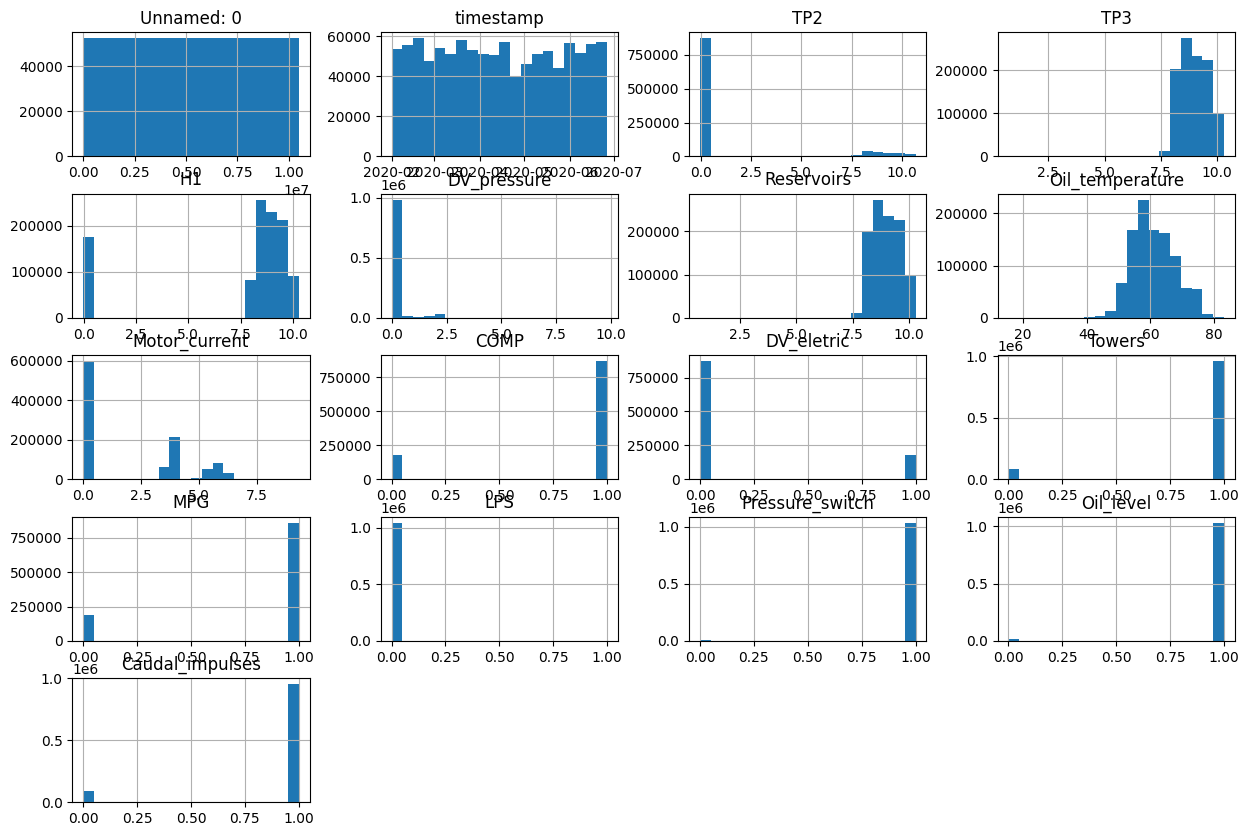

In [17]:
# Visualizations
# Example: Histogram for numerical features
data_frame.hist(bins=20, figsize=(15, 10))
plt.show()



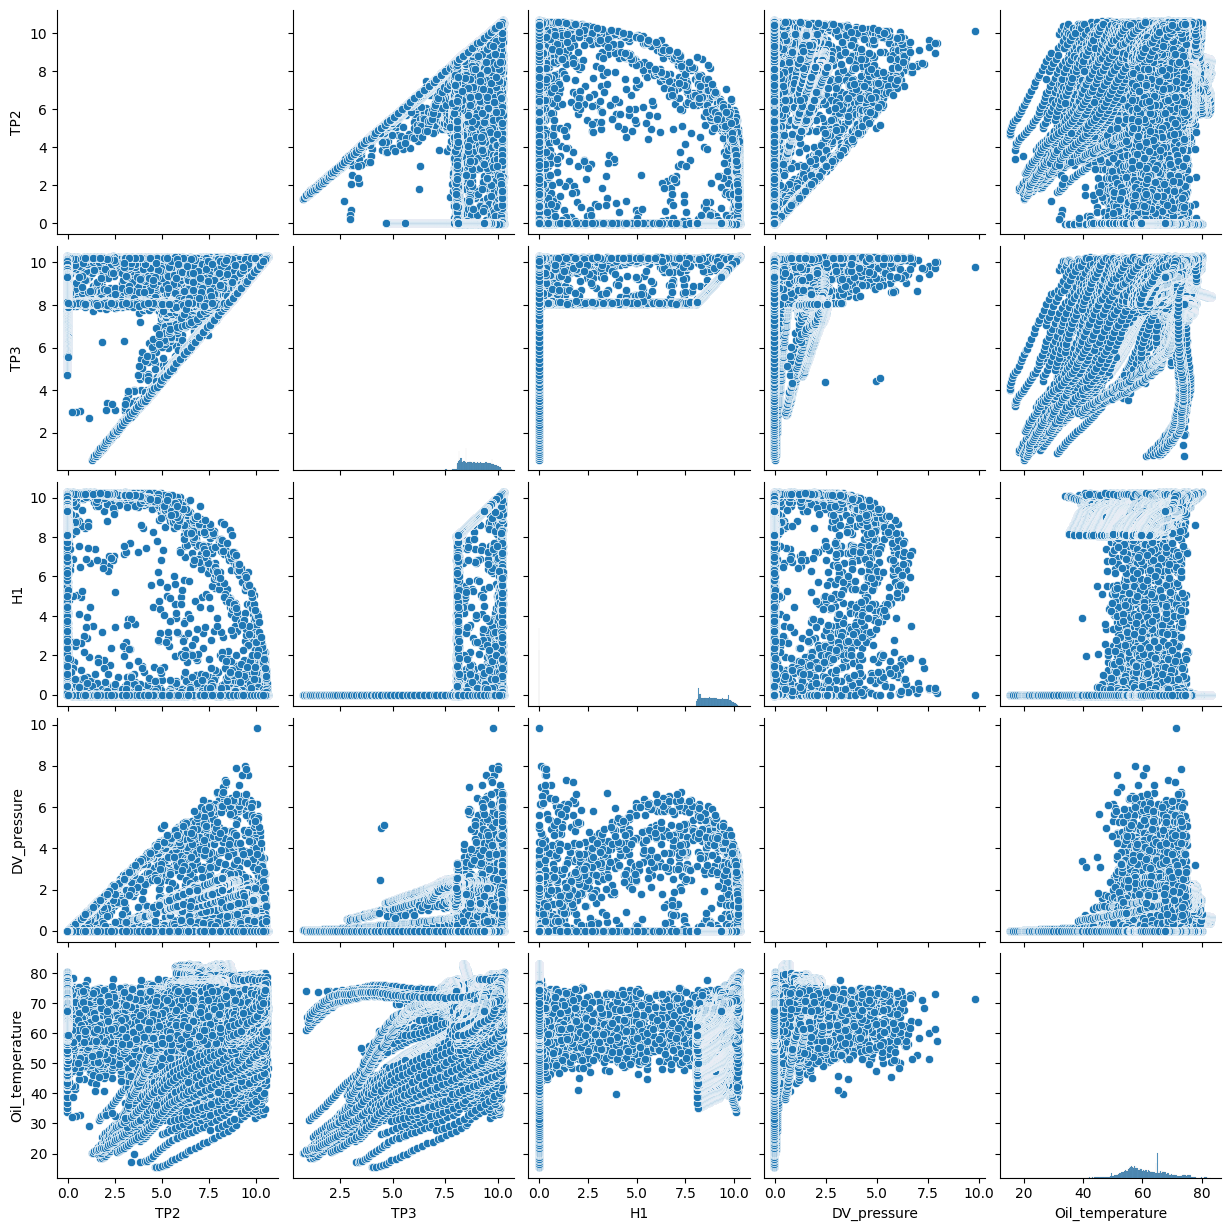

In [18]:
# Example: Pairplot for selected features
sns.pairplot(data_frame[['TP2', 'TP3', 'H1', 'DV_pressure', 'Oil_temperature']])
plt.show()



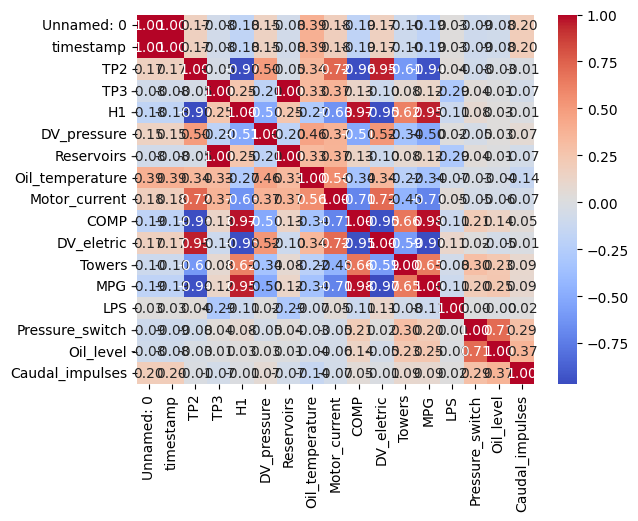

In [19]:
# Correlation matrix
correlation_matrix = data_frame.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Modeling:

In [12]:
# Assuming you want to predict 'Caudal_impulses' as the target variable
target_column = 'Caudal_impulses'

# Exclude 'timestamp' from features
features = data_frame.drop(['timestamp', target_column], axis=1)
target = data_frame[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation for regression
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.048987004003500846
R-squared Score: 0.3946512820953143


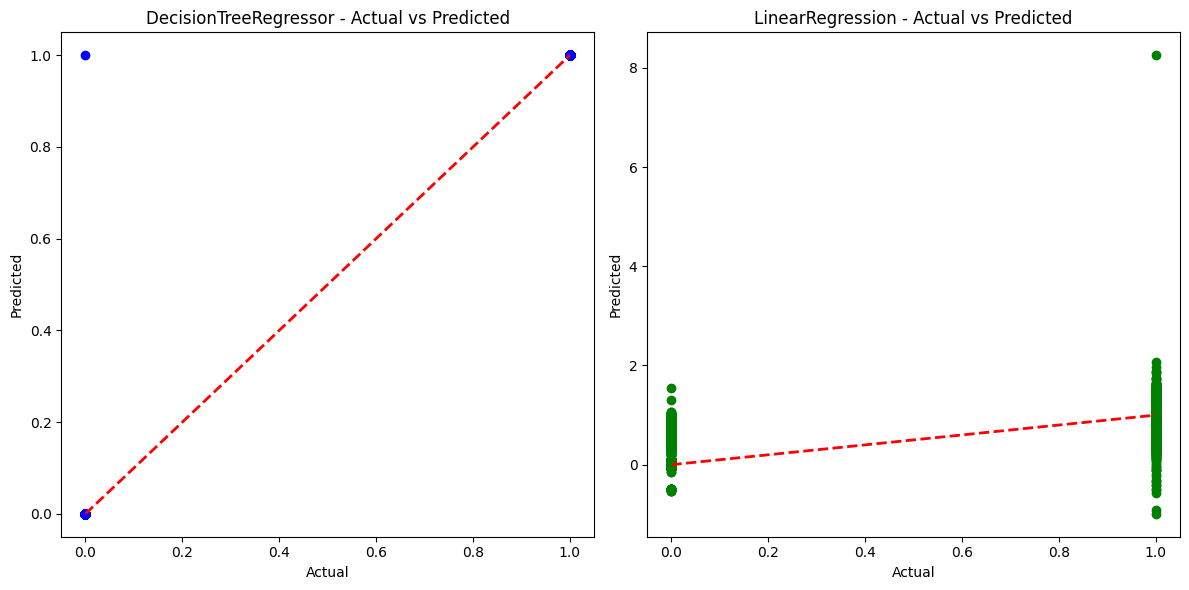

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you want to predict 'Caudal_impulses' as the target variable
target_column = 'Caudal_impulses'

# Exclude 'timestamp' from features
features = data_frame.drop(['timestamp', target_column], axis=1)
target = data_frame[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Create and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Actual vs Predicted for DecisionTreeRegressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, dt_y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('DecisionTreeRegressor - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Actual vs Predicted for LinearRegression
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('LinearRegression - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Research Question 1: Failure prediction

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from Excel file 

# Assuming 'Failure' is the column indicating system failure (1 for failure, 0 for normal)
target_column = 'COMP'

# Exclude unnecessary columns (like 'timestamp' if not needed)
features = data_frame.drop(['timestamp', target_column], axis=1)
target = data_frame[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation for classification
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.999990463247741
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36320
           1       1.00      1.00      1.00    173395

    accuracy                           1.00    209715
   macro avg       1.00      1.00      1.00    209715
weighted avg       1.00      1.00      1.00    209715

Confusion Matrix:
 [[ 36320      0]
 [     2 173393]]


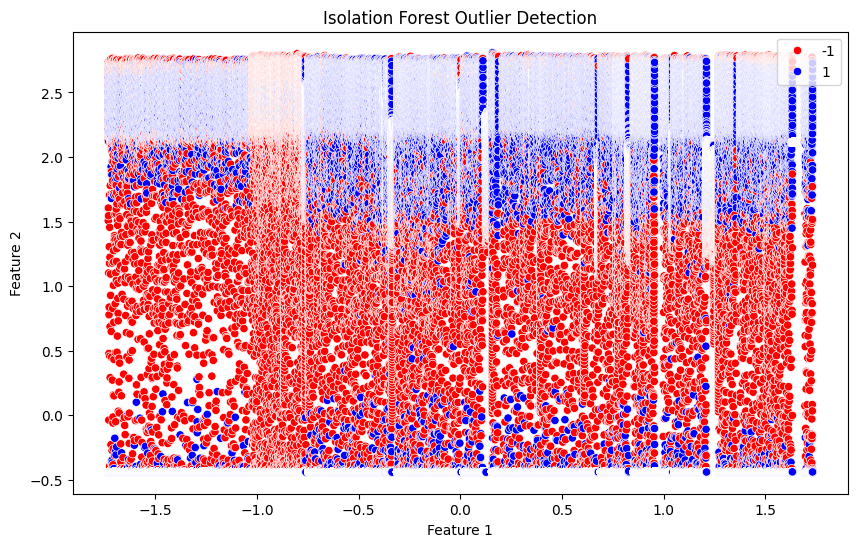

In [5]:
# Research Question 1: Failure prediction
# Data Preprocessing
numerical_columns = data_frame.select_dtypes(include=[np.number]).columns
X = data_frame[numerical_columns]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data_frame['outlier'] = isolation_forest.fit_predict(X_standardized)

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_standardized[:, 0], y=X_standardized[:, 1], hue=data_frame['outlier'], palette={1: 'blue', -1: 'red'})
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

# Research Question 2: Remaining Useful Life (RUL) Calculation

Mean Squared Error: 0.0005695486694222322
R-squared Score: 0.9960225253423403


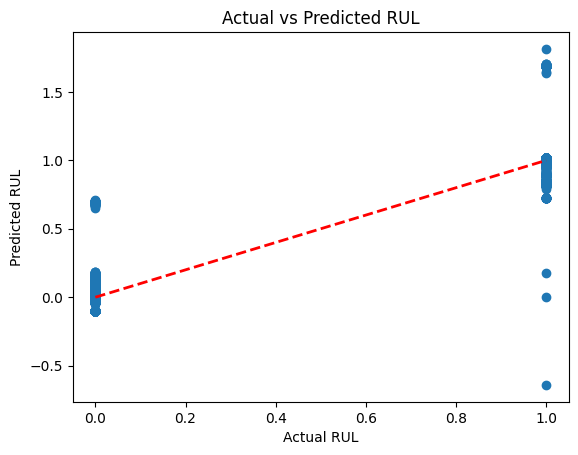

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
 

# Assuming 'RUL' is the column indicating Remaining Useful Life
target_column = 'COMP'

# Exclude unnecessary columns (like 'timestamp' if not needed)
features = data_frame.drop(['timestamp', target_column], axis=1)
target = data_frame[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting Actual vs Predicted RUL
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.show()


In [6]:
# Research Question 2: Remaining Useful Life (RUL) Calculation
# Time Series Analysis (Seasonal Decomposition)
# Assuming you have a datetime column in your DataFrame
if 'datetime_column' in data_frame.columns:
    data_frame.set_index('datetime_column', inplace=True)
    result = seasonal_decompose(data_frame['target_variable'], model='additive', period=12)  # Adjust the period as needed

    # Plot the decomposed time series
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(data_frame['target_variable'], label='Original')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residual')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("No datetime column found for time series analysis.")

No datetime column found for time series analysis.


# Research Question 3: Anomaly Detection

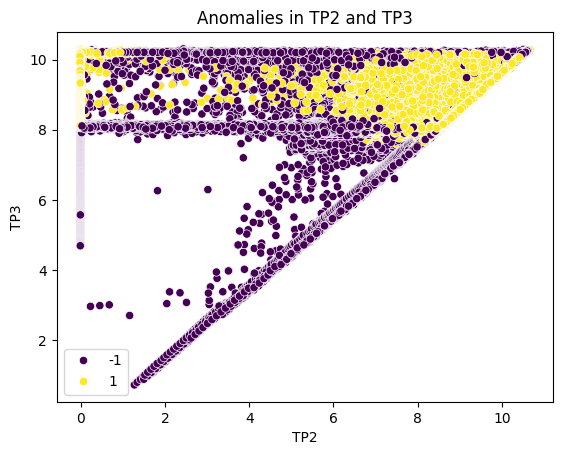

In [7]:

# Use the previously defined Isolation Forest model for anomaly detection
anomaly_predictions = isolation_forest.predict(X_standardized)

# Scatter plot to visualize anomalies in two features
sns.scatterplot(x='TP2', y='TP3', data=data_frame, hue=anomaly_predictions, palette='viridis')
plt.title('Anomalies in TP2 and TP3')
plt.xlabel('TP2')
plt.ylabel('TP3')
plt.show()

# Research Question 4: Sensor selection

c:\Users\Felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with Clusters:
         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_curren

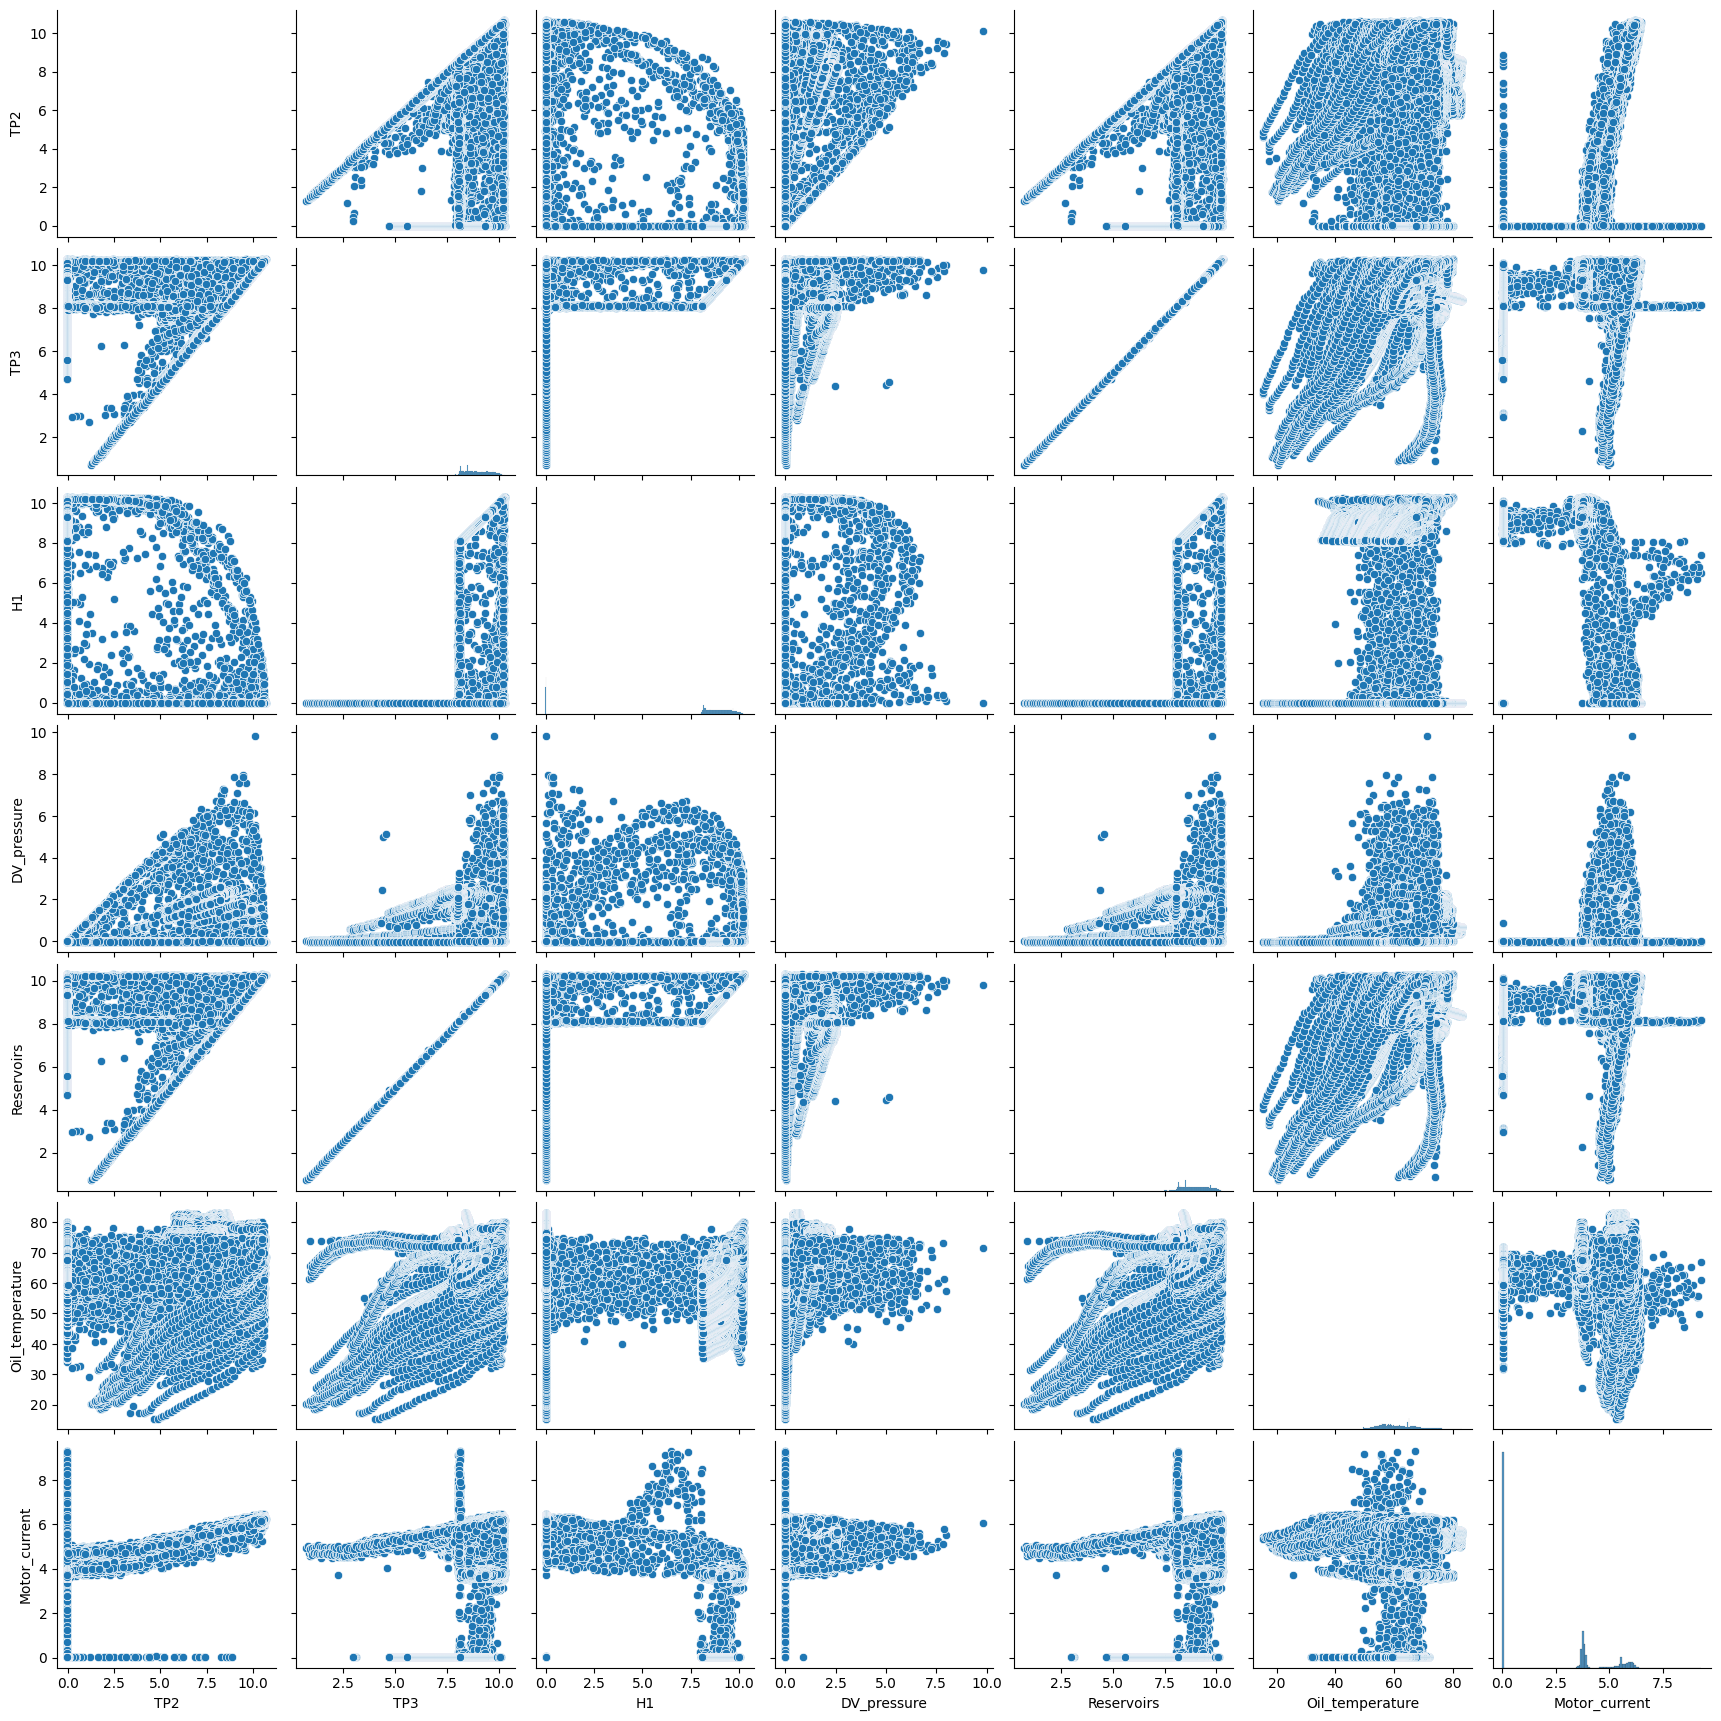

In [8]:

# Statistical Clustering (K-Means)
numerical_data = data_frame[numerical_columns]
kmeans = KMeans(n_clusters=3, random_state=42)
data_frame['cluster'] = kmeans.fit_predict(numerical_data)

# Display the DataFrame with clusters
print("DataFrame with Clusters:")
print(data_frame)

# Exploratory Data Analysis
# Display basic descriptive statistics
descriptive_stats = data_frame.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Display correlation matrix
correlation_matrix = data_frame.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Display pairplot for selected columns
selected_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']
sns.pairplot(data_frame[selected_columns])
plt.show()

# Machine Learning Models for Predictive Maintenance

In [ ]:
# Preprocessing
# Assuming 'target_variable' is a categorical column that needs encoding
# Assuming 'target_variable' is the column you want to predict
target_variable = 'DV_pressure'  # Replace with the actual name of your target variable


label_encoder = LabelEncoder()
data_frame[target_variable] = label_encoder.fit_transform(data_frame[target_variable])

# Introduce more noise to the target variable
np.random.seed(42)
noise = np.random.randint(0, 3, size=len(data_frame))
data_frame[target_variable] = (data_frame[target_variable] + noise) % 2

# Specify the features and target variable
features = ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current',
            'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Check if all features are in the DataFrame columns
missing_features = [feature for feature in features if feature not in data_frame.columns]
if missing_features:
    raise KeyError(f"Features {missing_features} not found in the DataFrame columns. Please check the column names.")

# Split the data into features (X) and target variable (y)
X = data_frame[features]
y = data_frame[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 
# Extract numerical columns for statistical analysis
numerical_columns = data_frame.select_dtypes(include=[np.number]).columns
numerical_data = data_frame[numerical_columns]

# Standardize the features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Split the data into features and target variable
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', 'Oil_temperature',
            'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = data_frame[features]
y = data_frame['DV_eletric']  # Replace with the actual name of your target variable

# Statistical Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data_frame['cluster'] = kmeans.fit_predict(numerical_data_scaled)  # Use scaled data for clustering


c:\Users\Felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Statistical Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data_frame['cluster'] = kmeans.fit_predict(numerical_data)


c:\Users\Felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Decision Tree Model Training and Evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


model_decision_tree = DecisionTreeRegressor(random_state=42)  # Use DecisionTreeRegressor for regression
model_decision_tree.fit(X_train, y_train)
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Display results for regression
print(f"Decision Tree Model - Mean Squared Error: {mse_decision_tree:.2f}")
print(f"Decision Tree Model - R-squared: {r2_decision_tree:.2f}")


Decision Tree Model - Mean Squared Error: 0.00
Decision Tree Model - R-squared: 1.00


In [ ]:
# Linear Regression Model Training and Evaluation
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
y_pred_linear_regression = model_linear_regression.predict(X_test)

# Evaluate the model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)


In [ ]:
# Linear Regression Model Training and Evaluation
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
y_pred_linear_regression = model_linear_regression.predict(X_test)

# Evaluate the model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)


In [ ]:
# Seasonal Decomposition
result = seasonal_decompose(data_frame['H1'], model='additive', period=12)


In [ ]:
# Anomaly Detection - Isolation Forest
isolation_forest = IsolationForest(contamination=0.01)
data_frame['anomaly'] = isolation_forest.fit_predict(numerical_data_scaled)

In [ ]:
# Specify features and target variable
features = data_frame[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', 'Oil_temperature',
                       'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
target = data_frame['H1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_frame['cluster'] = kmeans.fit_predict(numerical_data)


c:\Users\Felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import csv
import random
import re
from collections import defaultdict
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Replace 'file_name.xlsx' with the path to your Excel file
file_path = 'Metro.xlsx'

# Read the Excel file and store it in a DataFrame
data_frame = pd.read_excel(file_path)

# Display the DataFrame
print(data_frame)

         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towe

In [ ]:
# Extract numerical columns for outlier detection (assuming you want to detect outliers in numerical features)
numerical_columns = data_frame.select_dtypes(include=[np.number]).columns

# Extract features for outlier detection
X = data_frame[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
data_frame['outlier'] = isolation_forest.fit_predict(X_standardized)

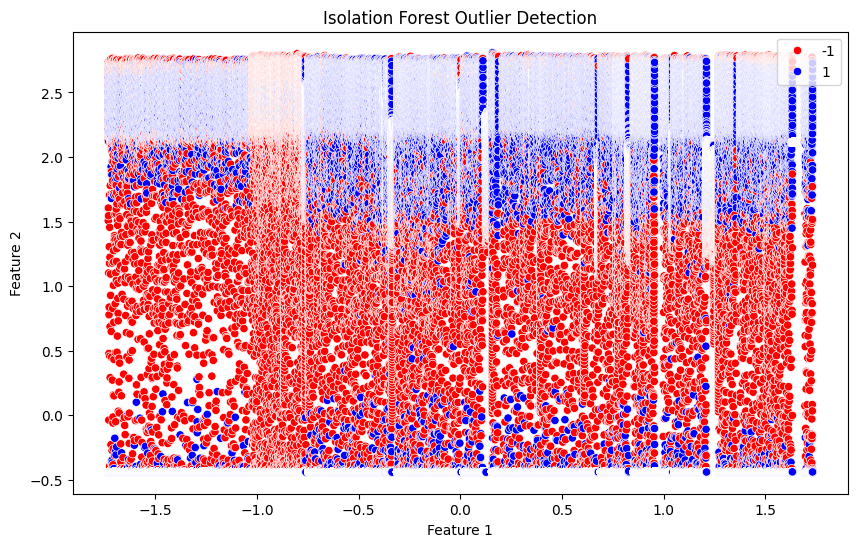

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_standardized[:, 0], y=X_standardized[:, 1], hue=data_frame['outlier'], palette={1: 'blue', -1: 'red'})
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

In [ ]:
data_frame_no_outliers = data_frame[data_frame['outlier'] == 1].drop('outlier', axis=1)

# Further data preparation steps as needed
# ...

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(data_frame_no_outliers)

DataFrame without outliers:
         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_cur

In [ ]:
column_title  = []
# Print all column titles 
for column in data_frame.columns:
    column_title.append(column)
print(column_title)

Column Titles:
['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']


In [ ]:
features = data_frame[column_title]
print(features)

         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towe

In [ ]:
# Data preprocessing
scaler = StandardScaler()
# Assuming df is your DataFrame containing all your features
numeric_features = data_frame.select_dtypes(include=['float64', 'int64']).columns
features_scaled = scaler.fit_transform(data_frame[numeric_features])


In [ ]:
# Train Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the dataset
model.fit(features_scaled)

IsolationForest(contamination=0.01)

In [ ]:
# Predict anomalies
anomaly_predictions = model.predict(features_scaled)
anomalies = features[anomaly_predictions == -1]

In [ ]:

# Predict anomalies
anomaly_predictions = model.predict(features_scaled)
anomalies = features[anomaly_predictions == -1]  # Retrieve the anomalies

In [ ]:
# Output the anomalies
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
         Unnamed: 0           timestamp     TP2     TP3     H1  DV_pressure  \
54108        541080 2020-02-08 08:32:09  10.312  10.142  2.518        4.000   
67411        674110 2020-02-10 01:11:43   9.878  10.116  4.128        5.402   
69883        698830 2020-02-10 11:21:57   9.422  10.128  2.716        3.630   
90840        908400 2020-02-13 04:21:46   9.560  10.118  2.464        3.404   
215179      2151790 2020-03-01 04:54:30   6.406  10.222  9.838        4.246   
...             ...                 ...     ...     ...    ...          ...   
1037061    10370610 2020-06-25 05:07:47   8.390   8.506 -0.014       -0.014   
1037062    10370620 2020-06-25 05:07:59   8.390   8.506 -0.014       -0.014   
1042629    10426290 2020-06-25 20:46:13   5.498  10.044  9.130        4.478   
1047582    10475820 2020-06-26 10:30:40   9.758  10.204  5.148        6.008   
1047989    10479890 2020-06-26 11:37:55   9.980  10.202  4.294        5.346   

         Reservoirs  Oil_temper

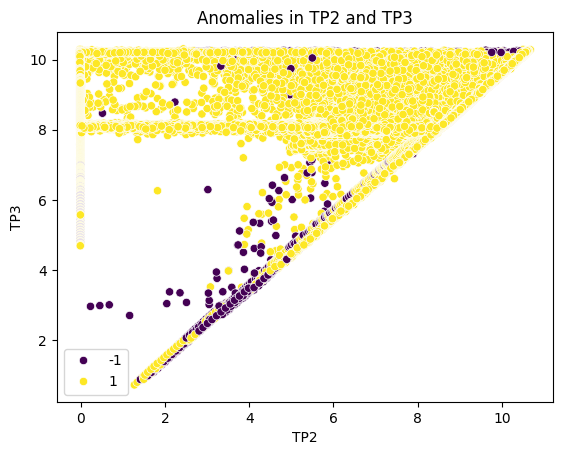

In [ ]:
# Scatter plot to visualize anomalies in two features
sns.scatterplot(x='TP2', y='TP3', data=features, hue=anomaly_predictions, palette='viridis')
plt.title('Anomalies in TP2 and TP3')
plt.xlabel('TP2')
plt.ylabel('TP3')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Assuming 'data_frame' is the DataFrame loaded from the MetroPT3 dataset

# Extract numerical columns for statistical analysis
numerical_columns = data_frame.select_dtypes(include=[np.number]).columns
numerical_data = data_frame[numerical_columns]

# Statistical Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data_frame['cluster'] = kmeans.fit_predict(numerical_data)

# Display the DataFrame with clusters
print("DataFrame with Clusters:")
print(data_frame)

c:\Users\Felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with Clusters:
         Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
0                 0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1                10 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2                20 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3                30 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4                40 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
...             ...                 ...    ...    ...    ...          ...   
1048570    10485700 2020-06-26 13:13:56 -0.010  9.382  9.370       -0.018   
1048571    10485710 2020-06-26 13:14:06 -0.010  9.366  9.356       -0.018   
1048572    10485720 2020-06-26 13:14:16 -0.012  9.356  9.346       -0.018   
1048573    10485730 2020-06-26 13:14:26 -0.012  9.344  9.332       -0.018   
1048574    10485740 2020-06-26 13:14:36 -0.012  9.332  9.320       -0.018   

         Reservoirs  Oil_temperature  Motor_curren

In [ ]:
! pip install statsmodels

     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/233.8 kB ? eta -:--:--
     ------ ------------------------------ 41.0/233.8 kB 487.6 kB/s eta 0:00:01
     ----------------- ------------------ 112.6/233.8 kB 819.2 kB/s eta 0:00:01
     ------------------------------- ------ 194.6/233.8 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 225.3/233.8 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 233.8/233.8 kB 894.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/9.1 MB 14.7 MB/s eta 0:00:01
   - -------------------------------------- 0.4/9.1 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/9.1 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.1 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.1 MB 6.2 MB/s eta 0:00:02
   

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Time Series Analysis (Seasonal Decomposition)
# Assuming you have a datetime column in your DataFrame
if 'datetime_column' in data_frame.columns:
    data_frame.set_index('datetime_column', inplace=True)

    # Seasonal Decomposition
    result = seasonal_decompose(data_frame['target_variable'], model='additive', period=12)  # Adjust the period as needed

    # Plot the decomposed time series
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(data_frame['target_variable'], label='Original')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residual')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("No datetime column found for time series analysis.")

No datetime column found for time series analysis.


Statistical analysis

In [ ]:

# Display basic descriptive statistics
descriptive_stats = data_frame.describe()
print("Descriptive Statistics:")
print(descriptive_stats)



Descriptive Statistics:
         Unnamed: 0     timestamp           TP2           TP3            H1  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242870e+06  1.586802e+18  1.436824e+00  8.963460e+00  1.356580e+03   
std    3.026977e+06  3.717397e+15  3.290119e+00  6.324664e-01  6.577332e+02   
min    0.000000e+00  1.580515e+18 -3.200000e-02  7.300000e-01  0.000000e+00   
25%    2.621435e+06  1.583542e+18 -1.400000e-02  8.468000e+00  1.249000e+03   
50%    5.242870e+06  1.586680e+18 -1.200000e-02  8.930000e+00  1.514000e+03   
75%    7.864305e+06  1.590075e+18 -1.000000e-02  9.472000e+00  1.813000e+03   
max    1.048574e+07  1.593177e+18  1.067600e+01  1.030200e+01  2.272000e+03   

        DV_pressure    Reservoirs  Oil_temperature  Motor_current  \
count  1.048575e+06  1.048575e+06     1.048575e+06   1.048575e+06   
mean   8.626027e-02  8.964050e+00     6.112691e+01   1.980451e+00   
std    4.437627e-01  6.317086e-01     6.690040e+00   2.32

In [ ]:
# Display correlation matrix
correlation_matrix = data_frame.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                 Unnamed: 0  timestamp       TP2       TP3        H1  \
Unnamed: 0         1.000000   0.999759  0.167336 -0.075009 -0.165612   
timestamp          0.999759   1.000000  0.165818 -0.076308 -0.164662   
TP2                0.167336   0.165818  1.000000 -0.046163 -0.896758   
TP3               -0.075009  -0.076308 -0.046163  1.000000  0.439435   
H1                -0.165612  -0.164662 -0.896758  0.439435  1.000000   
DV_pressure        0.151710   0.151123  0.497031 -0.196217 -0.473947   
Reservoirs        -0.075447  -0.076732 -0.047253  0.999993  0.440341   
Oil_temperature    0.388828   0.388632  0.344753  0.328428 -0.142515   
Motor_current      0.180131   0.178834  0.723220  0.366869 -0.457581   
COMP              -0.189358  -0.187938 -0.956288  0.130696  0.903879   
DV_eletric         0.167539   0.165629  0.946795 -0.101521 -0.882839   
Towers            -0.104315  -0.103573 -0.605439  0.083059  0.577387   
MPG               -0.189568  -0.187679 -0.9

In [ ]:

# Display pairplot for selected columns (adjust as needed)
selected_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']
sns.pairplot(data_frame[selected_columns])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
 
# Assuming 'target_variable' is the column you want to predict
target_variable = 'target_variable'  # Replace with the actual name of your target variable

# Preprocessing
# - Assuming 'target_variable' is a categorical column that needs encoding
label_encoder = LabelEncoder()
data_frame[target_variable] = label_encoder.fit_transform(data_frame[target_variable])

# Introduce more noise to the target variable
np.random.seed(42)
noise = np.random.randint(0, 3, size=len(data_frame))
data_frame[target_variable] = (data_frame[target_variable] + noise) % 2

# Specify the features and target variable
features = ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current',
            'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Split the data into features (X) and target variable (y)
X = data_frame[features]
y = data_frame[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.55

Confusion Matrix:
[[92091 47428]
 [46125 24071]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66    139519
           1       0.34      0.34      0.34     70196

    accuracy                           0.55    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.56      0.55      0.55    209715



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
 
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.22
R-squared: -0.00


# Anomaly Detection for Sensor Selection

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def predict_anomalies(input_data):
    # Load the dataset
    data = data_frame  # Replace with your dataset path

    # Select relevant features for anomaly detection
    features = data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', 'Oil_temperature',
                     'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]

    # Data preprocessing
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Train Isolation Forest model
    model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the dataset
    model.fit(features_scaled)

    # Predict anomalies for the input data
    input_features = input_data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', 'Oil_temperature',
                                 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
    input_features_scaled = scaler.transform(input_features)
    anomaly_prediction = model.predict(input_features_scaled)

    if -1 in anomaly_prediction:
        return "Anomaly detected in the input data"
    else:
        return "No anomaly detected in the input data"

# Example usage
input_data = pd.DataFrame({'TP2': [0.8], 'TP3': [1.2], 'H1': [0.9], 'DV_pressure': [0.7],
                           'Reservoirs': [1.1], 'Motor_current': [0.6], 'Oil_temperature': [1.0],
                           'COMP': [0.8], 'DV_eletric': [1.2], 'Towers': [0.9], 'MPG': [0.7],
                           'LPS': [1.0], 'Pressure_switch': [1.1], 'Oil_level': [0.6], 'Caudal_impulses': [1.2]})
prediction = predict_anomalies(input_data)
print(prediction)


Anomaly detected in the input data
